In [111]:
import pandas as pd
import numpy as np
import datetime

In [112]:
##use this to look for unique values
#a = disp['type'].unique()
#print (sorted(a))

In [113]:
 #import data sets
account = pd.read_csv('../data/raw/data_berka/account.asc',delimiter=";")
card = pd.read_csv('../data/raw/data_berka/card.asc',delimiter=";")
client = pd.read_csv('../data/raw/data_berka/client.asc',delimiter=";")
disp = pd.read_csv('../data/raw/data_berka/disp.asc',delimiter=";")
district = pd.read_csv('../data/raw/data_berka/district.asc',delimiter=";")
loan = pd.read_csv('../data/raw/data_berka/loan.asc',delimiter=";")
order = pd.read_csv('../data/raw/data_berka/order.asc',delimiter=";")
trans = pd.read_csv('../data/raw/data_berka/trans.asc',delimiter=";")

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
#define fucntions to translate
def translate_type(x):
    if x == "PRIJEM":
        return "Credit"
    elif x== "VYDAJ":
        return "Withdrawal"
    else:
        return "None"
    
def translate_operation(x):
    if x=="VYBER KARTOU":
        return "credit card withdrawal"
    elif x=="VKLAD":
        return "credit cash"
    elif x== "PREVOD Z UCTU":
        return "collection from another bank"
    elif x=="VYBER":
        return "withdrawal in cash"
    elif x=="PREVOD NA UCET":
        return "remittance to another bank"
    else:
        return "none"
    
def translate_k_symbol(x):
    if x=="POJISTNE":
        return "insurrance payment"
    elif x=="SLUZBY":
        return "payment for statement"
    elif x== "UROK":
        return "interest credited"
    elif x=="SANKC. UROK":
        return "sanction interest"
    elif x=="SIPO":
        return "household"
    elif x=="DUCHOD":
        return "old-age pension"
    elif x=="UVER":
        return "loan payment"   
    else:
        return "none"
    
    
def translate_k_symbol_order(x):
    if x=="POJISTNE":
        return "insurrance payment"
    elif x=="SIPO":
        return "household payment"
    elif x=="LEASING":
        return "leasing"
    elif x=="UVER":
        return "loan payment"   
    else:
        return "none"    
    
def translate_frequency(x):
    if x=="POPLATEK MESICNE":
        return "monthly issuance"
    elif x=="POPLATEK TYDNE":
        return "weekly issuance"
    elif x== "POPLATEK PO OBRATU":
        return "issuance after transaction"
    else:
        return "none"

#**Processing Account Table**

In [115]:

#create variables from date
account['year'] = account['date'].astype(str).str[:2].astype(int) + 1900
account['month'] = account['date'].astype(str).str[2:4].astype(int) 
account['day'] = account['date'].astype(str).str[4:6].astype(int)

In [116]:
#create full date variable
account['dateInt']=account['year'].astype(str) + account['month'].astype(str).str.zfill(2)+ account['day'].astype(str).str.zfill(2)
account['Date'] = pd.to_datetime(account['dateInt'], format='%Y%m%d')

In [117]:

# Calculate length of relationsihp (grouped by year)
account['lor'] = (pd.to_datetime('1996-12-31') - account['Date']).dt.days // 365

In [118]:
#@Processing Account Table
account["frequency"] = account["frequency"].map(translate_frequency)

In [119]:
#@Processing Account Table
account['dateInt']=account['year'].astype(str) + account['month'].astype(str).str.zfill(2)+ account['day'].astype(str).str.zfill(2)
account['Date'] = pd.to_datetime(account['dateInt'], format='%Y%m%d')
#https://stackoverflow.com/questions/58072683/combine-year-month-and-day-in-python-to-create-a-date

In [120]:
#creating cleaned Dataset
account_cleaned = account[["account_id", "district_id","frequency", "year","Date","lor"]]
#export cleaned data
account_cleaned.to_csv ("../data/interim/account_cleaned.csv", index = False, header=True)

In [121]:
account_cleaned.head()

,account_id,district_id,frequency,year,Date,lor
0,576,55,monthly issuance,1993,1993-01-01,4
1,3818,74,monthly issuance,1993,1993-01-01,4
2,704,55,monthly issuance,1993,1993-01-01,4
3,2378,16,monthly issuance,1993,1993-01-01,4
4,2632,24,monthly issuance,1993,1993-01-02,3


## Processing Client Table

In [122]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [123]:
# Transform the birth day into year
client['birth_year'] = '19' + client['birth_number'].astype(str).str[:2]
client['birth_year'] = client['birth_year'].astype(int)

# Transform the birth day to day
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
client['birth_month'] = client['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
client['gender'] = 'M'
client.loc[client['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
client.loc[client['birth_month'] > 50, 'birth_month'] = client.loc[client['birth_month'] > 50, 'birth_month'] - 50

# Age
client['age'] = 1999 - client['birth_year']

# Age group
client['age_group'] = client['age'] // 10 * 10


#Creating final birth date variable
client['dateInt']=client['birth_year'].astype(str) + client['birth_month'].astype(str).str.zfill(2)+ client['birth_day'].astype(str).str.zfill(2)
client['client_birth_date'] = pd.to_datetime(client['dateInt'], format='%Y%m%d')


In [124]:
#dropping unnecessary columns
client_cleaned = client.drop(['birth_number','birth_year','birth_month','birth_day','dateInt'],axis=1)
#Export data
client_cleaned.to_csv ("../data/interim/client_cleaned.csv", index = False, header=True)


In [125]:
client_cleaned.head()

,client_id,district_id,gender,age,age_group,client_birth_date
0,1,18,F,29,20,1970-12-13
1,2,1,M,54,50,1945-02-04
2,3,1,F,59,50,1940-10-09
3,4,5,M,43,40,1956-12-01
4,5,5,F,39,30,1960-07-03


## Processing Loan table


In [126]:
#loan creating date variables
loan['year'] = loan['date'].astype(str).str[:2].astype(int) + 1900
loan['month'] = loan['date'].astype(str).str[2:4].astype(int) 
loan['day'] = loan['date'].astype(str).str[4:6].astype(int)
# Column for full date
loan['loan_date'] = pd.to_datetime('19' + loan['date'].astype(str), format='%Y%m%d')


In [127]:
#Renaming loan variables. 
loan = loan.rename(columns={'amount':'loan_amount','payments':'loan_payments','status':'loan_status','duration':'loan_duration'})

In [128]:
#droppping unnecessary columns in loan table

loan_cleaned = loan.drop(['date','month','day'],axis=1)

#export data
loan_cleaned.to_csv ("../data/interim/loan_cleaned.csv", index = False, header=True)


In [129]:

loan_cleaned.head()


,loan_id,account_id,loan_amount,loan_duration,loan_payments,loan_status,year,loan_date
0,5314,1787,96396,12,8033.0,B,1993,1993-07-05
1,5316,1801,165960,36,4610.0,A,1993,1993-07-11
2,6863,9188,127080,60,2118.0,A,1993,1993-07-28
3,5325,1843,105804,36,2939.0,A,1993,1993-08-03
4,7240,11013,274740,60,4579.0,A,1993,1993-09-06


## Processing District table

In [130]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [131]:
#Renaming the District Variables with Correct names
district.rename({'A1':'Dist_Id', 'A2':'Dist_Name', 'A3':'Region','A4':'Population','A5':'MNC_POP_0_5H','A6':'MNC_POP_5H_2T', 'A7':'MNC_POP_2T_10T' , 'A8':'MNC_POP_>_10T', 'A9':'CITIES', 'A10':'RATIO_URBAN', 'A11':'AVG_SLRY',
                           'A12':'UNEMP_95','A13':'UNEMP_96','A14':'ENP_Per_1000','A15':'Crime_Comm_95','A16':'Crime_Comm_96' }, axis = 'columns' , inplace=True)

In [132]:
district[district['UNEMP_95']==('?')]
#Rows with inconsistent values '?' in UMEMP 95 & CRIME_COMM_95

,Dist_Id,Dist_Name,Region,Population,MNC_POP_0_5H,MNC_POP_5H_2T,MNC_POP_2T_10T,MNC_POP_>_10T,CITIES,RATIO_URBAN,AVG_SLRY,UNEMP_95,UNEMP_96,ENP_Per_1000,Crime_Comm_95,Crime_Comm_96
68,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,?,7.01,124,?,1358


In [133]:
district['UNEMP_95'].replace('?', '0', inplace=True)
district['Crime_Comm_95'].replace('?', '0', inplace=True)
#https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe

district['UNEMP_95'] = pd.to_numeric(district["UNEMP_95"], downcast="float")
district['Crime_Comm_95'] = pd.to_numeric(district["Crime_Comm_95"], downcast="integer")
#https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-of-strings-to-floats-in-python

In [134]:
district['UNEMP_95'].replace(0,district['UNEMP_95'].mean(), inplace=True)
district['Crime_Comm_95'].replace(0,round(district['Crime_Comm_95'].mean(),0), inplace=True)
# Re-adjusting the 0 Values with the Mean values of the individual columns

In [135]:
district_cleaned = district
#export data
district_cleaned.to_csv ("../data/interim/district_cleaned.csv", index = False, header=True)


In [136]:
district_cleaned.head()

,Dist_Id,Dist_Name,Region,Population,MNC_POP_0_5H,MNC_POP_5H_2T,MNC_POP_2T_10T,MNC_POP_>_10T,CITIES,RATIO_URBAN,AVG_SLRY,UNEMP_95,UNEMP_96,ENP_Per_1000,Crime_Comm_95,Crime_Comm_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616.0,3040


# Creating RFM Variables 

In [137]:
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN


In [138]:
with_trans = trans[trans['type'] != 'PRIJEM']
#Subsetting only the outbound transactions

#Trans creating date variables
with_trans['year'] = with_trans['date'].astype(str).str[:2].astype(int) + 1900
with_trans['month'] = with_trans['date'].astype(str).str[2:4].astype(int) 
with_trans['day'] = with_trans['date'].astype(str).str[4:6].astype(int)
# Column for full date
with_trans['date'] = pd.to_datetime('19' + with_trans['date'].astype(str), format='%Y%m%d')


#Subsetting only the outbound transactions before 1996 Dec 31st
trans_2 = with_trans[with_trans['year'] <= 1996 ]

ld = datetime.date(1996,12, 31)
trans_2['ld'] = ld
trans_2['ld'] = pd.to_datetime(trans_2['ld'])
trans_2['R'] = (trans_2['ld'] - trans_2['date']).dt.days  # Just Recency for easier manipulation later

<ipython-input-138-180e2a97e8ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_trans['year'] = with_trans['date'].astype(str).str[:2].astype(int) + 1900
<ipython-input-138-180e2a97e8ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_trans['month'] = with_trans['date'].astype(str).str[2:4].astype(int)
<ipython-input-138-180e2a97e8ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [139]:
#Creating RFM VARIABLES
RFM = pd.DataFrame(trans_2['account_id'].drop_duplicates())

R = pd.DataFrame(trans_2.groupby('account_id')['R'].min())
R['account_id'] = R.index
F = pd.DataFrame(trans_2.groupby('account_id')['date'].count())
F['account_id'] = F.index
M = pd.DataFrame(trans_2.groupby('account_id')['amount'].sum())
M['account_id'] = M.index

mapping = dict(R[['account_id', 'R']].values)
RFM['R'] = RFM.account_id.map(mapping)
mapping2 = dict(F[['account_id', 'date']].values)
RFM['F'] = RFM.account_id.map(mapping2)
mapping3  = dict(M[['account_id', 'amount']].values)
RFM['M'] = RFM.account_id.map(mapping3)

del R
del F
del M
del trans_2
del with_trans
RFM.head()

,account_id,R,F,M
136,2378,0,175,2048761.2
189,485,0,260,1616160.0
222,3510,0,138,1844288.0
249,2122,0,175,1692310.0
267,374,0,134,1141974.8


In [140]:
quintiles = RFM[['R', 'F', 'M']].quantile([.2, .4, .6, .8]).to_dict()

def r_score(x,c):
    if x <= quintiles[c][.2]:
        return 5
    elif x <= quintiles[c][.4]:
        return 4
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5
    
RFM['RS'] = RFM['R'].apply(lambda x: r_score(x,'R'))
RFM['FS'] = RFM['F'].apply(lambda x: fm_score(x,'F'))
RFM['MS'] = RFM['M'].apply(lambda x: fm_score(x,'M'))

RFM['RFM'] = RFM['RS'] + RFM['FS'] + RFM ['MS']

# Now you can map this RFM score directly to the Datascience base table.

#https://guillaume-martin.github.io/rfm-segmentation-with-python.html

In [141]:
RFM

,account_id,R,F,M,RS,FS,MS,RFM
136,2378,0,175,2048761.2,5,5,5,15
189,485,0,260,1616160.0,5,5,5,15
222,3510,0,138,1844288.0,5,4,5,14
249,2122,0,175,1692310.0,5,5,5,15
267,374,0,134,1141974.8,5,4,5,14
...,...,...,...,...,...,...,...,...
447173,1683,0,1,1300.0,5,1,1,7
447547,6440,0,1,19300.0,5,1,1,7
447568,10280,0,1,11800.0,5,1,1,7
447670,3543,0,1,14.6,5,1,1,7


## Work on Orders Table


In [142]:
#replace empty values
order["k_symbol"].replace(" ","NONE")
#translate
order["k_symbol"] = order["k_symbol"].map(translate_k_symbol_order)
#copy table
order_cleaned = order.copy()
# export new table
order_cleaned.to_csv ("../data/interim/order_cleaned.csv", index = False, header=True)
order_cleaned.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,household payment
1,29402,2,ST,89597016,3372.7,loan payment
2,29403,2,QR,13943797,7266.0,household payment
3,29404,3,WX,83084338,1135.0,household payment
4,29405,3,CD,24485939,327.0,none


In [143]:
orders_count = order_cleaned.groupby('account_id')['amount'].agg('count') #count of orders per account
orders_count=pd.DataFrame(orders_count) 

order_cleaned = order_cleaned.drop(columns=['k_symbol','account_to','order_id']) #dropping columns

x = order_cleaned.groupby(['account_id','bank_to'])['amount'].agg('mean').reset_index() #mean sent to other banks per account

x = x.pivot(columns='bank_to',values='amount', index='account_id') #pivoting. getting per 1 account per row

orders_clean = pd.merge(orders_count,x,on='account_id',how='left')  #merging with statistics
orders_clean =orders_clean.fillna(0) #filling NA with o

cols_orders = list(orders_clean.columns.values)[1:] #listing columns in orders 

orders_clean['sum_of_orders']=orders_clean[cols_orders].sum(axis = 1) #sum of averages sent to other banks per account.
orders_clean.reset_index()


,account_id,amount,AB,CD,EF,GH,IJ,KL,MN,OP,QR,ST,UV,WX,YZ,sum_of_orders
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2452.0,2452.0
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7266.0,3372.7,0.0,0.0,0.0,10638.7
2,3,3,3539.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0,0.0,5001.0
3,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1681.5,0.0,0.0,1681.5
4,5,1,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,11328,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4674.0,4674.0
3754,11333,1,0.0,0.0,0.0,0.0,3286.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3286.7
3755,11349,2,0.0,0.0,0.0,10886.0,0.0,6998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17884.0
3756,11359,3,254.0,0.0,4502.3,0.0,0.0,0.0,0.0,4518.0,0.0,0.0,0.0,0.0,0.0,9274.3


In [144]:
orders_clean

,amount,AB,CD,EF,GH,IJ,KL,MN,OP,QR,ST,UV,WX,YZ,sum_of_orders
account_id,,,,,,,,,,,,,,,
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2452.0,2452.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7266.0,3372.7,0.0,0.0,0.0,10638.7
3,3,3539.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0,0.0,5001.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1681.5,0.0,0.0,1681.5
5,1,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4674.0,4674.0
11333,1,0.0,0.0,0.0,0.0,3286.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3286.7
11349,2,0.0,0.0,0.0,10886.0,0.0,6998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17884.0


## Card table cleaning/processing



In [145]:
# creating date variables
card['year'] = card['issued'].astype(str).str[:2].astype(int) + 1900
card['month'] = card['issued'].astype(str).str[2:4].astype(int) 
card['day'] = card['issued'].astype(str).str[4:6].astype(int)

#Creating final date variable
card['dateInt']=card['year'].astype(str) + card['month'].astype(str).str.zfill(2)+ card['day'].astype(str).str.zfill(2)
card['card_issue_date'] = pd.to_datetime(card['dateInt'], format='%Y%m%d')

In [146]:
#dropping unneeded columns
card_cleaned = card.drop(columns=['month','day','dateInt','issued'])
#export data
card_cleaned.to_csv ("../data/interim/card_cleaned.csv", index = False, header=True)
card_cleaned.head()

,card_id,disp_id,type,year,card_issue_date
0,1005,9285,classic,1993,1993-11-07
1,104,588,classic,1994,1994-01-19
2,747,4915,classic,1994,1994-02-05
3,70,439,classic,1994,1994-02-08
4,577,3687,classic,1994,1994-02-15


# Trans cleaning

In [147]:
#Create year, month day variable
trans['year'] = trans['date'].astype(str).str[:2].astype(int) + 1900
trans['month'] = trans['date'].astype(str).str[2:4].astype(int) 
trans['day'] = trans['date'].astype(str).str[4:6].astype(int)


In [148]:
trans.isnull().sum()


trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
year               0
month              0
day                0
dtype: int64

In [149]:
#translate information
trans["type"] = trans["type"].map(translate_type)
trans["operation"] = trans["operation"].map(translate_operation)
trans["k_symbol"] = trans["k_symbol"].map(translate_k_symbol)

In [150]:
#replace misswriten entry
trans= trans.replace("VYBER","withdrawal")
trans_cleaned = trans.copy()

In [151]:
# export new table
trans_cleaned.to_csv ("../data/interim/trans_cleaned.csv", index = False, header=True)
trans_cleaned.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,year,month,day
0,695247,2378,930101,Credit,credit cash,700.0,700.0,none,NaN,NaN,1993,1,1
1,171812,576,930101,Credit,credit cash,900.0,900.0,none,NaN,NaN,1993,1,1
2,207264,704,930101,Credit,credit cash,1000.0,1000.0,none,NaN,NaN,1993,1,1
3,1117247,3818,930101,Credit,credit cash,600.0,600.0,none,NaN,NaN,1993,1,1
4,579373,1972,930102,Credit,credit cash,400.0,400.0,none,NaN,NaN,1993,1,2


In [152]:
#subset to year 1996
trans1996 = trans[trans.year == 1996]

In [153]:
#create count variable for credit
trans1996_1= trans1996[trans1996["type"] == "Credit"]
trans1996_1=trans1996_1.groupby("account_id").count().reset_index()
trans1996_1["Credit_cnt"] =  trans1996_1["trans_id"]
trans1996_1 = trans1996_1[["account_id","Credit_cnt"]]

In [154]:
#create count variable for withdrawal
trans1996_2= trans1996[trans1996["type"] == "Withdrawal"]
trans1996_2=trans1996_2.groupby("account_id").count().reset_index()
trans1996_2["Withdrawal_cnt"] =  trans1996_2["trans_id"]
trans1996_2 = trans1996_2[["account_id","Withdrawal_cnt"]]

In [155]:
#merge new independent variables to table
trans1996 = trans1996.merge(trans1996_1,how="left",on="account_id")
trans1996 = trans1996.merge(trans1996_2,how="left",on="account_id")

In [156]:
#Create average withdrawal variable
trans1996_3= trans1996[trans1996["type"] == "Withdrawal"]
trans1996_3=trans1996_3.groupby("account_id").mean().reset_index()
trans1996_3["Withdrawal_Avg"] =  trans1996_3["amount"]
trans1996_3 = trans1996_3[["account_id","Withdrawal_Avg"]]

In [157]:
#create average credit variable
trans1996_4= trans1996[trans1996["type"] == "Credit"]
trans1996_4=trans1996_4.groupby("account_id").mean().reset_index()
trans1996_4["Credit_Avg"] =  trans1996_4["amount"]
trans1996_4 = trans1996_4[["account_id","Credit_Avg"]]


In [158]:
#merge new variables into table
trans1996 = trans1996.merge(trans1996_3,how="left",on="account_id")
trans1996 = trans1996.merge(trans1996_4,how="left",on="account_id")


In [159]:
#Create max amount for credit on transaction
trans1996_5= trans1996[trans1996["type"] == "Credit"]
trans1996_5["AmountMax_Cred"] =  trans1996_5["amount"]
trans1996_5 = trans1996_5[["account_id","AmountMax_Cred"]]
trans1996_5= trans1996_5.groupby("account_id").max().reset_index()


#Create min amount for credit on transaction
trans1996_8= trans1996[trans1996["type"] == "Credit"]
trans1996_8["AmountMin_Cred"] =  trans1996_8["amount"]
trans1996_8 = trans1996_8[["account_id","AmountMin_Cred"]]
trans1996_8=trans1996_8.groupby("account_id").min().reset_index()

#Create max amount for withdrawal on transaction
trans1996_9= trans1996[trans1996["type"] == "Withdrawal"]
trans1996_9["AmountMax_With"] =  trans1996_9["amount"]
trans1996_9 = trans1996_9[["account_id","AmountMax_With"]]
trans1996_9=trans1996_9.groupby("account_id").max().reset_index()

#Create min amount for withdrawal on transaction
trans1996_0= trans1996[trans1996["type"] == "Withdrawal"]
trans1996_0["AmountMin_With"] =  trans1996_0["amount"]
trans1996_0 = trans1996_0[["account_id","AmountMin_With"]]
trans1996_0=trans1996_0.groupby("account_id").min().reset_index()

#create Max balance variable
trans1996_6 =  trans1996.copy()
trans1996_6["BalanceMax"] =  trans1996_6["balance"]
trans1996_6 = trans1996_6[["account_id","BalanceMax"]]
trans1996_6=trans1996_6.groupby("account_id").max().reset_index()

#create Min balance variable
trans1996_7 =  trans1996.copy()
trans1996_7["BalanceMin"] =  trans1996_7["balance"]
trans1996_7 = trans1996_7[["account_id","BalanceMin"]]
trans1996_7=trans1996_7.groupby("account_id").min().reset_index()


<ipython-input-159-d3f34892ada6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1996_5["AmountMax_Cred"] =  trans1996_5["amount"]
<ipython-input-159-d3f34892ada6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1996_8["AmountMin_Cred"] =  trans1996_8["amount"]
<ipython-input-159-d3f34892ada6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [160]:
#merge created variables
trans1996 = trans1996.merge(trans1996_5,how="left",on="account_id")
trans1996 = trans1996.merge(trans1996_6,how="left",on="account_id")
trans1996 = trans1996.merge(trans1996_7,how="left",on="account_id")
trans1996 = trans1996.merge(trans1996_8,how="left",on="account_id")
trans1996 = trans1996.merge(trans1996_9,how="left",on="account_id")
trans1996 = trans1996.merge(trans1996_0,how="left",on="account_id")


In [161]:
#round averate to integer
trans1996["Credit_Avg"] = trans1996["Credit_Avg"].round()
trans1996["Withdrawal_Avg"] = trans1996["Withdrawal_Avg"].round()

In [162]:
#create Max balance variable
trans1996_6 =  trans1996
trans1996_6["BalanceMax"] =  trans1996_6["balance"]
trans1996_6 = trans1996_6[["account_id","BalanceMax"]]
trans1996_6=trans1996_6.groupby("account_id").max().reset_index()

In [163]:
#select only desired variables
Trans_variables = trans1996[["account_id","Credit_cnt","Credit_Avg", "Withdrawal_cnt", "Withdrawal_Avg","AmountMax_Cred","AmountMin_Cred","AmountMax_With","AmountMin_With","BalanceMax","BalanceMin"]]
Trans_variables=Trans_variables.groupby("account_id").mean()


In [164]:
#merge with previously created variables
trans_cleaned= Trans_variables.merge(RFM, how= "inner", on= "account_id")

# Create dependent Variables

In [165]:
#accounts prior to 1996
account1996 =account_cleaned[account["year"] <= 1996]

In [166]:
#create dependent variables
loan1997 = loan[loan["year"] == 1997]

In [167]:
#assign 1 to granted loan
loan1997["loan_granted"] = int(1)

<ipython-input-167-9ba33051bed1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1997["loan_granted"] = int(1)


In [168]:
#drop columns
loan_dv = loan1997[["account_id", "loan_granted"]]

In [169]:
#merge new dependent variable
account_dv = account1996.merge(loan_dv, how = "left", on = "account_id")

In [170]:
account_dv["loan_granted"] = account_dv["loan_granted"].fillna(0)

In [171]:
account_dv

,account_id,district_id,frequency,year,Date,lor,loan_granted
0,576,55,monthly issuance,1993,1993-01-01,4,0.0
1,3818,74,monthly issuance,1993,1993-01-01,4,0.0
2,704,55,monthly issuance,1993,1993-01-01,4,0.0
3,2378,16,monthly issuance,1993,1993-01-01,4,0.0
4,2632,24,monthly issuance,1993,1993-01-02,3,0.0
...,...,...,...,...,...,...,...
3597,3190,1,monthly issuance,1996,1996-12-30,0,0.0
3598,1390,69,monthly issuance,1996,1996-12-30,0,0.0
3599,1988,72,monthly issuance,1996,1996-12-30,0,0.0
3600,2362,16,monthly issuance,1996,1996-12-30,0,0.0


In [172]:
#subset card to use only 1997
card1997 = card[card["year"] == 1997]


In [173]:
#set 1 to credit card granted
card1997["card_granted"] = int(1)

<ipython-input-173-35ad5cd7d13d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card1997["card_granted"] = int(1)


In [174]:
card_dv = card1997[["disp_id","card_granted"]]

In [175]:
disp_card1997 = disp.merge(card_dv, how = "inner", on = "disp_id")

In [176]:
disp_card_dv=  disp_card1997[["account_id","card_granted"]]

In [177]:
#Merge new variable
account_dv = account_dv.merge(disp_card_dv, how = "left", on = "account_id")

In [178]:
account_dv["card_granted"] = account_dv["card_granted"].fillna(0)

# Merging Final data set

In [179]:
#select only owner type accounts
disp_owner = disp[disp["type"] == "OWNER"]

In [180]:
#merge Account and Disposition
account_disp= account1996.merge(disp_owner, how="inner", on= "account_id")

In [181]:

account_disp

,account_id,district_id,frequency,year,Date,lor,disp_id,client_id,type
0,576,55,monthly issuance,1993,1993-01-01,4,692,692,OWNER
1,3818,74,monthly issuance,1993,1993-01-01,4,4601,4601,OWNER
2,704,55,monthly issuance,1993,1993-01-01,4,844,844,OWNER
3,2378,16,monthly issuance,1993,1993-01-01,4,2873,2873,OWNER
4,2632,24,monthly issuance,1993,1993-01-02,3,3177,3177,OWNER
...,...,...,...,...,...,...,...,...,...
3597,3190,1,monthly issuance,1996,1996-12-30,0,3856,3856,OWNER
3598,1390,69,monthly issuance,1996,1996-12-30,0,1682,1682,OWNER
3599,1988,72,monthly issuance,1996,1996-12-30,0,2416,2416,OWNER
3600,2362,16,monthly issuance,1996,1996-12-30,0,2854,2854,OWNER


In [182]:
#subset loan to year 1996
loan_cleaned = loan_cleaned[loan_cleaned["year"]== 1996]

In [183]:
#drop columns not used
loan_cleaned= loan_cleaned.drop(["loan_date","year","loan_id"], axis=1)

In [184]:
#merge loan
account_disp_loan= account_disp.merge(loan_cleaned, how="left", on= "account_id")

In [185]:
#merge order
account_disp_loan_order= account_disp_loan.merge(orders_clean , how="left", on= "account_id")

In [186]:
#merge transactions
account_disp_loan_order_trans= account_disp_loan_order.merge(trans_cleaned, how="left", on= "account_id")

In [187]:
card_cleaned = card_cleaned.drop(["card_id","card_issue_date"],axis= 1)
card_disp = disp_owner.merge(card_cleaned, how = "left", on = "disp_id")

#account_disp_loan_order_trans_card= account_disp_loan_order.merge(trans_cleaned, how="left", on= "account_id")


In [188]:
#rename columns
card_disp.rename(columns= {"type_x":"disp_type","type_y":"card_type","year":"card_year"}, inplace = True)

In [189]:
#drop unused columns
card_disp.drop(["client_id","disp_id"],axis=1,inplace= True)

In [190]:
#merge card
account_disp_loan_order_trans_card= account_disp_loan_order_trans.merge(card_disp, how="left", on= "account_id")

In [191]:
#drop unused variables
district_cleaned.drop(["Dist_Name","MNC_POP_0_5H","MNC_POP_5H_2T","MNC_POP_2T_10T","MNC_POP_>_10T","UNEMP_95", "Crime_Comm_95" ], axis=1, inplace= True)


In [192]:
#merge district
account_disp_loan_order_trans_card_dist= account_disp_loan_order_trans_card.merge(district_cleaned, how="left",left_on= "district_id",right_on="Dist_Id" )

In [193]:
client_disp = disp_owner.merge(client_cleaned, how = "left", on = "client_id")

In [194]:
#drop unused variables
client_disp.drop(["disp_id","client_id","type","district_id","client_birth_date"],axis=1,inplace= True )

In [195]:
#merge client to the final table
Final_Table= account_disp_loan_order_trans_card_dist.merge(client_disp, how="left",on="account_id" )


In [196]:
#drop unused variables
Final_Table.drop(["disp_id", "client_id","type","Date","district_id","Dist_Id"], axis=1, inplace = True)
#rename columns
Final_Table.rename(columns= {"year":"account_year"}, inplace = True)


In [197]:
#Clean null values
Final_Table["loan_amount"] = Final_Table["loan_amount"].fillna(0)
Final_Table["loan_duration"] = Final_Table["loan_duration"].fillna(0)
Final_Table["loan_payments"] = Final_Table["loan_payments"].fillna(0)
Final_Table["amount"] = Final_Table["amount"].fillna(0)
Final_Table["AB"] = Final_Table["AB"].fillna(0)
Final_Table["CD"] = Final_Table["CD"].fillna(0)
Final_Table["EF"] = Final_Table["EF"].fillna(0)
Final_Table["GH"] = Final_Table["GH"].fillna(0)
Final_Table["IJ"] = Final_Table["IJ"].fillna(0)
Final_Table["KL"] = Final_Table["KL"].fillna(0)
Final_Table["MN"] = Final_Table["MN"].fillna(0)
Final_Table["OP"] = Final_Table["OP"].fillna(0)
Final_Table["QR"] = Final_Table["QR"].fillna(0)
Final_Table["ST"] = Final_Table["ST"].fillna(0)
Final_Table["UV"] = Final_Table["UV"].fillna(0)
Final_Table["WX"] = Final_Table["WX"].fillna(0)
Final_Table["YZ"] = Final_Table["YZ"].fillna(0)
Final_Table["loan_status"] = Final_Table["loan_status"].fillna("NA")
Final_Table["card_type"] = Final_Table["card_type"].fillna("NA")
Final_Table["card_year"] = Final_Table["card_year"].fillna(0)
Final_Table["AmountMin_Cred"] = Final_Table["AmountMin_Cred"].fillna(0)
Final_Table["Credit_cnt"] = Final_Table["Credit_cnt"].fillna(0)
Final_Table["Credit_Avg"] = Final_Table["Credit_Avg"].fillna(0)
Final_Table["sum_of_orders"] = Final_Table["sum_of_orders"].fillna(0)
Final_Table["AmountMax_Cred"] = Final_Table["AmountMax_Cred"].fillna(0)

In [198]:
#drop Accounts that have no RFM nor transactions
Final_Table=Final_Table[~Final_Table["BalanceMin"].isnull()]

In [199]:
account_dv= account_dv[["account_id","loan_granted","card_granted"]]
Final_Table= Final_Table.merge(account_dv, how = "left", on = "account_id")

In [200]:
Final_Table.columns

Index(['account_id', 'frequency', 'account_year', 'lor', 'loan_amount',
       'loan_duration', 'loan_payments', 'loan_status', 'amount', 'AB', 'CD',
       'EF', 'GH', 'IJ', 'KL', 'MN', 'OP', 'QR', 'ST', 'UV', 'WX', 'YZ',
       'sum_of_orders', 'Credit_cnt', 'Credit_Avg', 'Withdrawal_cnt',
       'Withdrawal_Avg', 'AmountMax_Cred', 'AmountMin_Cred', 'AmountMax_With',
       'AmountMin_With', 'BalanceMax', 'BalanceMin', 'R', 'F', 'M', 'RS', 'FS',
       'MS', 'RFM', 'disp_type', 'card_type', 'card_year', 'Region',
       'Population', 'CITIES', 'RATIO_URBAN', 'AVG_SLRY', 'UNEMP_96',
       'ENP_Per_1000', 'Crime_Comm_96', 'gender', 'age', 'age_group',
       'loan_granted', 'card_granted'],
      dtype='object')

In [201]:
Final_Table.head()

,account_id,frequency,account_year,lor,loan_amount,loan_duration,loan_payments,loan_status,amount,AB,...,RATIO_URBAN,AVG_SLRY,UNEMP_96,ENP_Per_1000,Crime_Comm_96,gender,age,age_group,loan_granted,card_granted
0,576,monthly issuance,1993,4,0.0,0.0,0.0,NA,1.0,0.0,...,33.9,8743,2.43,111,3894,F,63,60,0.0,0.0
1,3818,monthly issuance,1993,4,0.0,0.0,0.0,NA,3.0,0.0,...,100.0,10673,5.44,100,18347,M,64,60,0.0,0.0
2,704,monthly issuance,1993,4,0.0,0.0,0.0,NA,2.0,0.0,...,33.9,8743,2.43,111,3894,M,54,50,0.0,0.0
3,2378,monthly issuance,1993,4,0.0,0.0,0.0,NA,1.0,0.0,...,56.9,8427,1.54,107,1913,F,24,20,0.0,0.0
4,2632,monthly issuance,1993,3,0.0,0.0,0.0,NA,3.0,0.0,...,80.0,8991,2.01,128,5273,M,61,60,0.0,0.0


In [202]:
#Export Cleaned Table
Final_Table.to_csv ("../data/processed/Final_Table.csv", index = False, header=True)

## Data Analysis and Visualization

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns


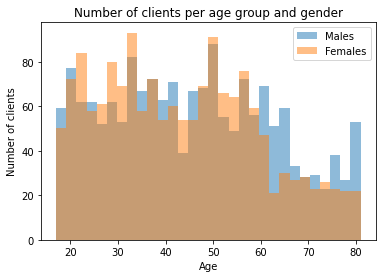

In [204]:
#Number of clients per age group and gender
fig, ax = plt.subplots()
ax.hist(Final_Table.loc[Final_Table.gender == 'M', 'age'], bins=30, alpha=0.5, label='Males')
ax.hist(Final_Table.loc[Final_Table.gender == 'F', 'age'], bins=30, alpha=0.5, label='Females')

ax.set_title('Number of clients per age group and gender')
ax.set_xlabel('Age')
ax.set_ylabel('Number of clients')
ax.legend()
plt.show()

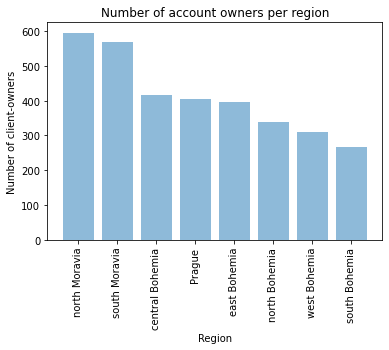

In [205]:
#Number of account orders per region
# Calculate the population per continent
num_clients_region = Final_Table.groupby('Region')['account_id'].agg(['count'])
num_clients_region = num_clients_region.sort_values(by='count', ascending=False)

# Bar plot
fig, ax = plt.subplots()
ax.bar(num_clients_region.index, num_clients_region['count'],alpha=0.5)
ax.set_title('Number of account owners per region')
plt.xticks(rotation='vertical')
ax.set_xlabel('Region')
ax.set_ylabel('Number of client-owners')
plt.show()

Text(0.5, 0.98, 'Distribution of RFM score and values')

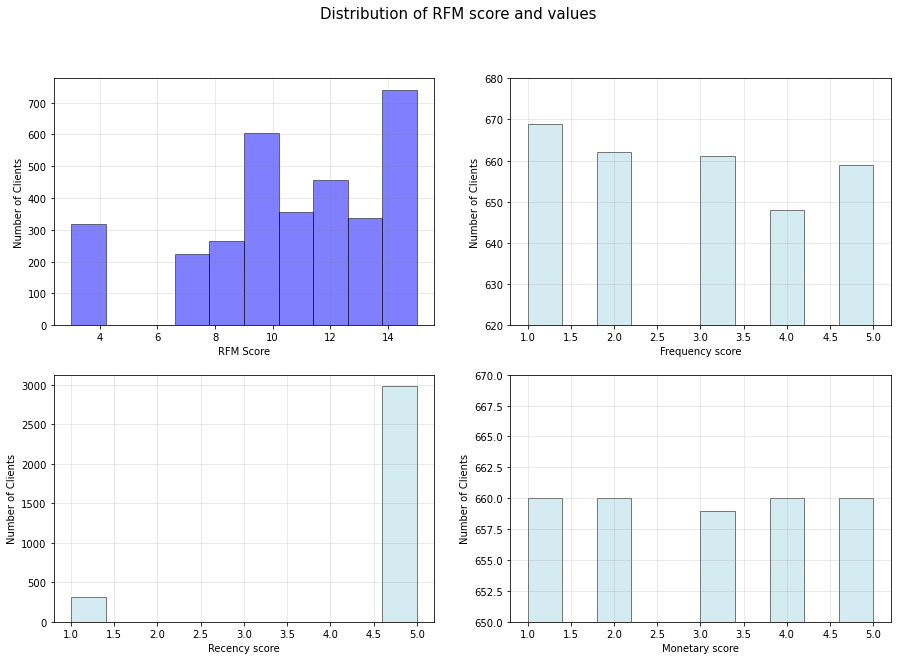

In [206]:
# matplotlib histogram
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax[0,0].hist(Final_Table['RFM'], color = 'blue', edgecolor = 'black', alpha=0.5)
ax[1,0].hist(Final_Table['RS'], color = 'lightblue', edgecolor = 'black', alpha=0.5)
ax[0,1].hist(Final_Table['FS'], color = 'lightblue', edgecolor = 'black', alpha=0.5)
ax[1,1].hist(Final_Table['MS'], color = 'lightblue', edgecolor = 'black', alpha=0.5)

ax[0,0].set_xlabel('RFM Score')
ax[0,0].set_ylabel('Number of Clients')

ax[1,0].set_xlabel('Recency score')
ax[1,0].set_ylabel('Number of Clients')

ax[0,1].set_xlabel('Frequency score')
ax[0,1].set_ylabel('Number of Clients')
ax[0,1].set_ylim([620,680])

ax[1,1].set_xlabel('Monetary score')
ax[1,1].set_ylabel('Number of Clients')
ax[1,1].set_ylim([650,670])


plt.rc('grid', linestyle="-", color='grey', alpha=0.2)
ax[0,0].grid()
ax[1,0].grid()
ax[0,1].grid()
ax[1,1].grid()

fig.suptitle('Distribution of RFM score and values', size=15)


In [207]:
loan_values = Final_Table['loan_granted']

In [208]:
# Gender Distribution Age Group wise
gender_dist = pd.crosstab(index=Final_Table['age_group'],
                        columns=Final_Table['gender'],normalize="index")

gender_dist.head()

gender,F,M
age_group,,
10,0.458716,0.541284
20,0.529851,0.470149
30,0.510604,0.489396
40,0.501656,0.498344
50,0.517628,0.482372


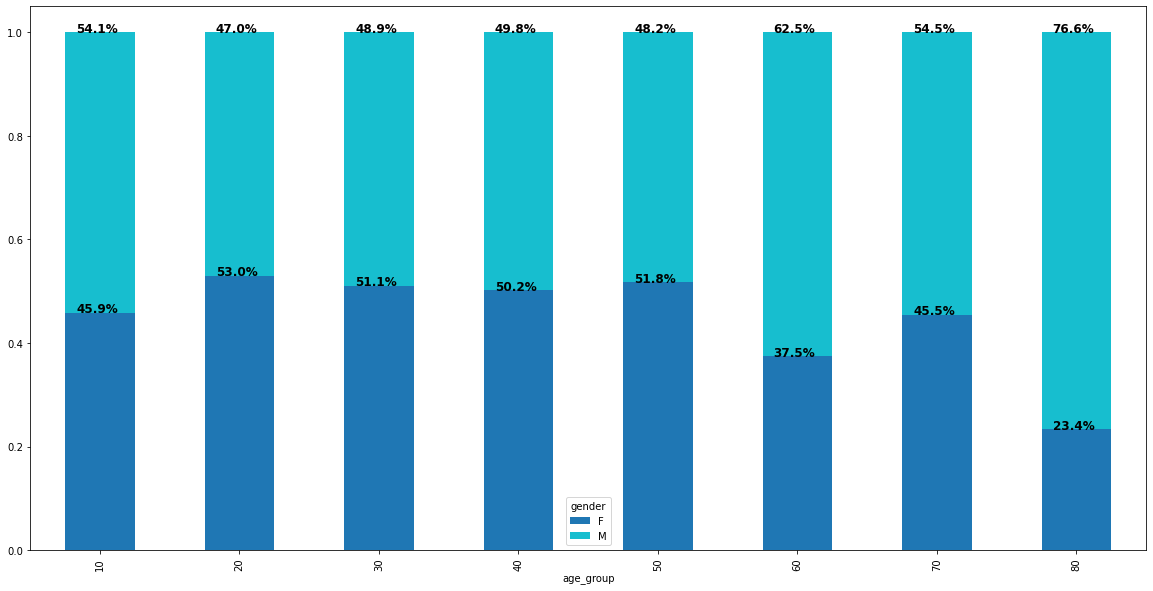

In [209]:
gender_dist.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(20, 10))


for n, x in enumerate([*gender_dist.index.values]):
    for (proportion, y_loc) in zip(gender_dist.loc[x],
                                   gender_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

In [210]:
Final_Table.head()

,account_id,frequency,account_year,lor,loan_amount,loan_duration,loan_payments,loan_status,amount,AB,...,RATIO_URBAN,AVG_SLRY,UNEMP_96,ENP_Per_1000,Crime_Comm_96,gender,age,age_group,loan_granted,card_granted
0,576,monthly issuance,1993,4,0.0,0.0,0.0,NA,1.0,0.0,...,33.9,8743,2.43,111,3894,F,63,60,0.0,0.0
1,3818,monthly issuance,1993,4,0.0,0.0,0.0,NA,3.0,0.0,...,100.0,10673,5.44,100,18347,M,64,60,0.0,0.0
2,704,monthly issuance,1993,4,0.0,0.0,0.0,NA,2.0,0.0,...,33.9,8743,2.43,111,3894,M,54,50,0.0,0.0
3,2378,monthly issuance,1993,4,0.0,0.0,0.0,NA,1.0,0.0,...,56.9,8427,1.54,107,1913,F,24,20,0.0,0.0
4,2632,monthly issuance,1993,3,0.0,0.0,0.0,NA,3.0,0.0,...,80.0,8991,2.01,128,5273,M,61,60,0.0,0.0


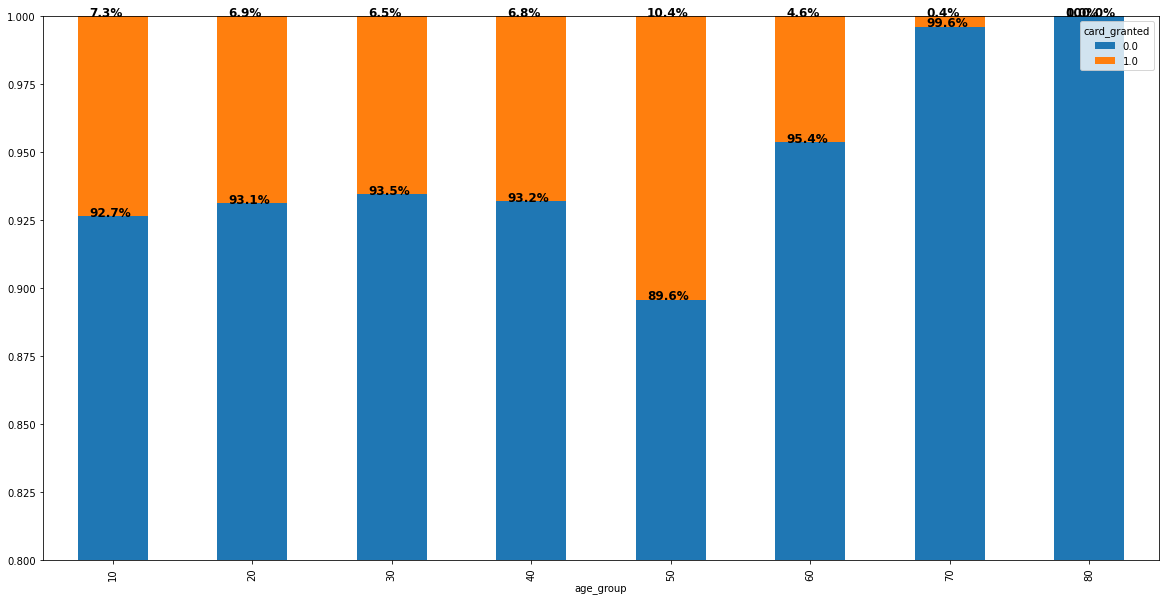

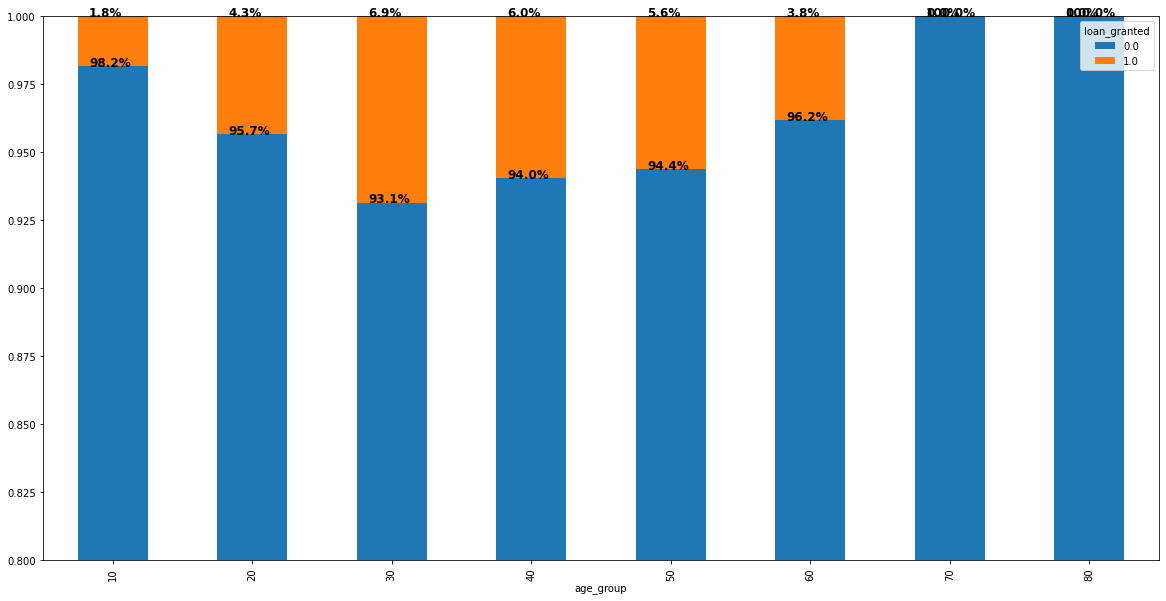

In [211]:
# Age Group Distribution Card Granted wise
card_dist = pd.crosstab(index=Final_Table['age_group'],
                        columns=Final_Table['card_granted'],normalize="index")

# Age Group Distribution Loan Granted wise
loan_dist = pd.crosstab(index=Final_Table['age_group'],
                        columns=Final_Table['loan_granted'],normalize="index")


#Creating side by side plots
plt.plot1 = card_dist.plot(kind='bar', 
                    stacked=True, 
                    figsize=(20, 10),ylim = [0.8,1])
for n, x in enumerate([*card_dist.index.values]):
    for (proportion, y_loc) in zip(card_dist.loc[x],
                                   card_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")




plt.plot2 = loan_dist.plot(kind='bar', 
                    stacked=True, 
                    figsize=(20, 10),
                          ylim = [0.8,1])

for n, x in enumerate([*loan_dist.index.values]):
    for (proportion, y_loc) in zip(loan_dist.loc[x],
                                   loan_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")



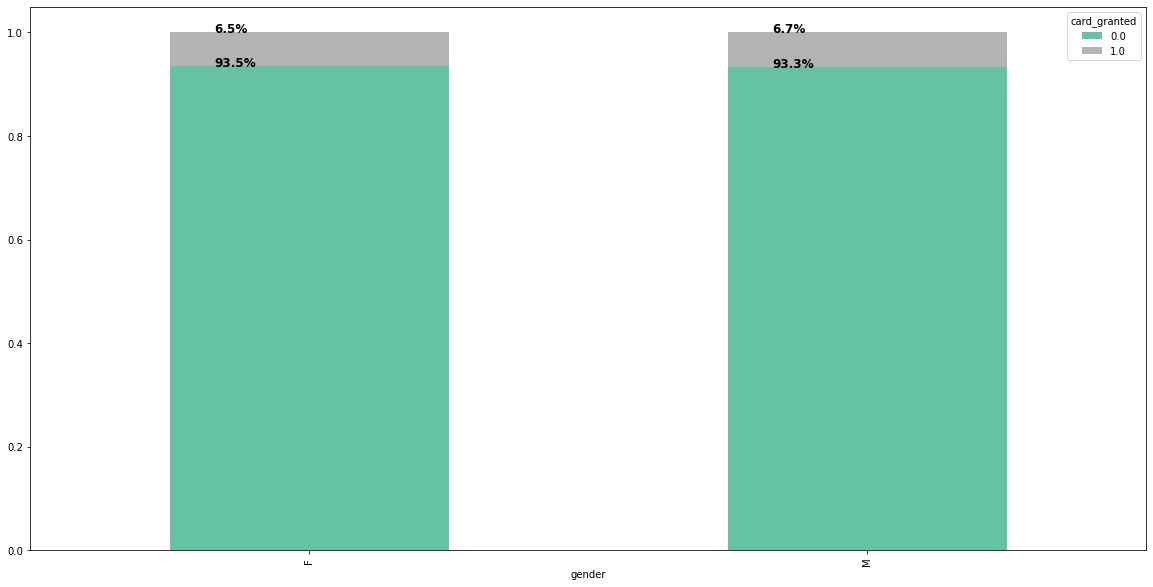

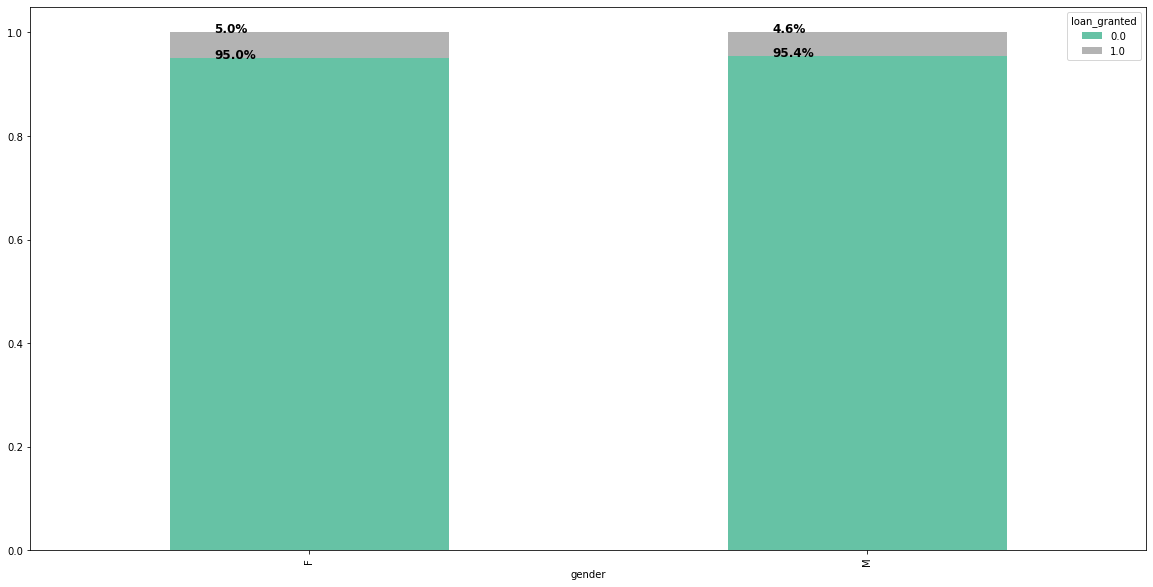

In [212]:
# Gender Distribution Credit Card Granted wise
card_gen_dist = pd.crosstab(index=Final_Table['gender'],
                        columns=Final_Table['card_granted'],normalize="index")

# Gender Distribution Loan Granted wise
loan_gen_dist = pd.crosstab(index=Final_Table['gender'],
                        columns=Final_Table['loan_granted'],normalize="index")

#Creating side by side plots
plt.plot1 = card_gen_dist.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2',
                    figsize=(20, 10))
for n, x in enumerate([*card_gen_dist.index.values]):
    for (proportion, y_loc) in zip(card_gen_dist.loc[x],
                                   card_gen_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")




plt.plot2 = loan_gen_dist.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2',
                    figsize=(20, 10))

for n, x in enumerate([*loan_gen_dist.index.values]):
    for (proportion, y_loc) in zip(loan_gen_dist.loc[x],
                                   loan_gen_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


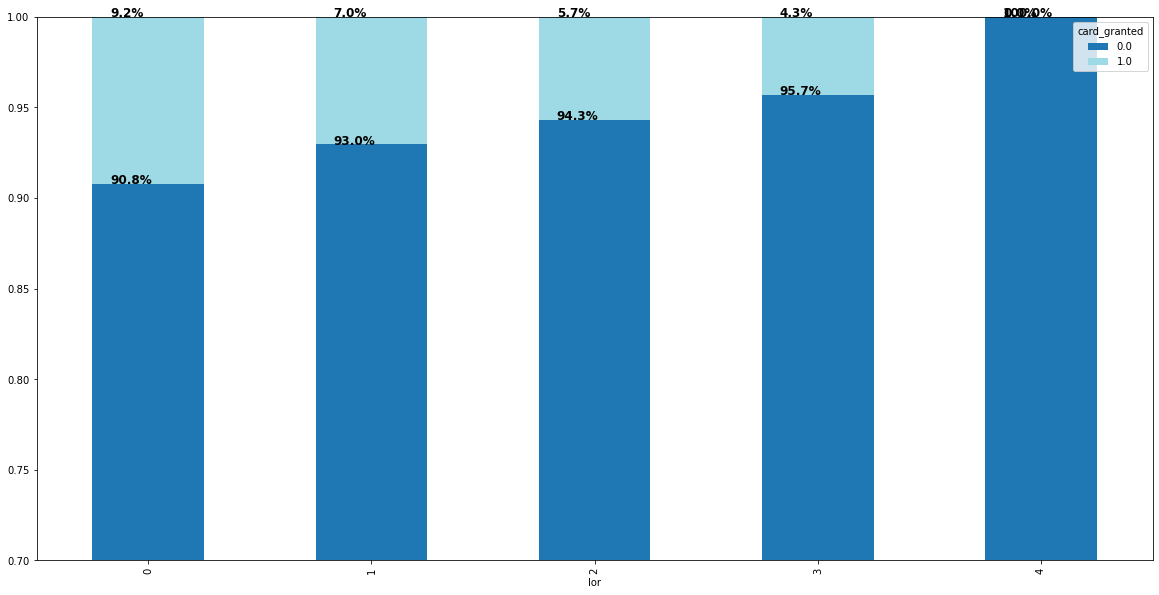

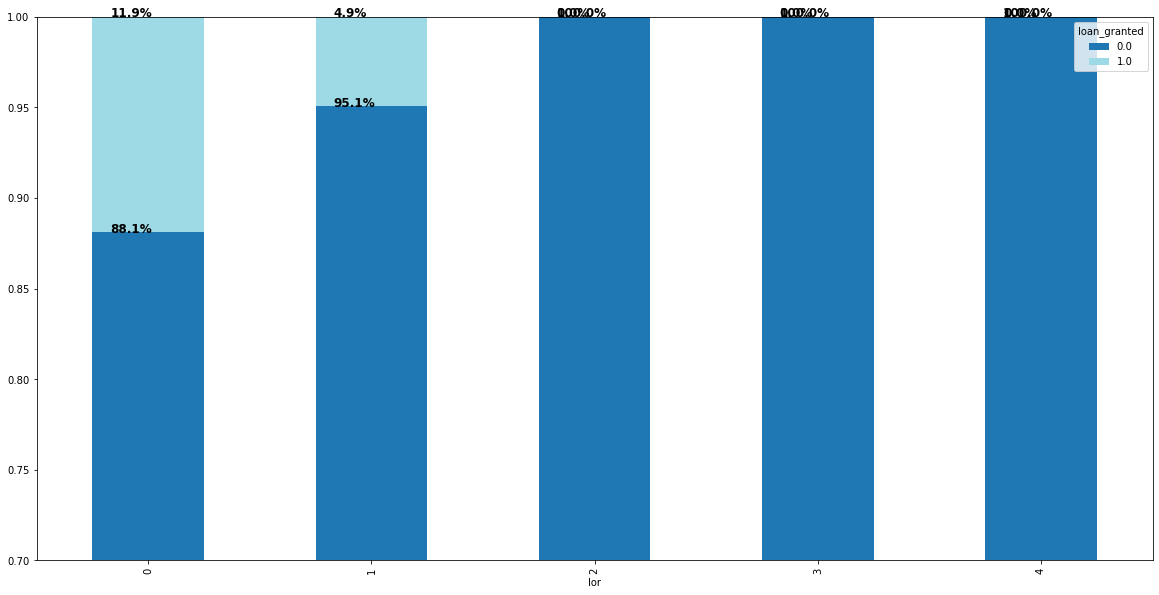

In [213]:
# LOR Distribution Card Granted wise
LOR_card_dist = pd.crosstab(index=Final_Table['lor'],
                        columns=Final_Table['card_granted'],normalize="index")

# LOR Distribution Loan Granted wise
LOR_loan_dist = pd.crosstab(index=Final_Table['lor'],
                        columns=Final_Table['loan_granted'],normalize="index")


#Creating side by side plots
plt.plot1 = LOR_card_dist.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20',
                    figsize=(20, 10),
                    ylim = [0.7,1])

for n, x in enumerate([*LOR_card_dist.index.values]):
    for (proportion, y_loc) in zip(LOR_card_dist.loc[x],
                                   LOR_card_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.plot2 = LOR_loan_dist.plot(kind='bar', 
                    stacked=True,
                    colormap='tab20',
                    figsize=(20, 10),
                    ylim = [0.7,1])



for n, x in enumerate([*LOR_loan_dist.index.values]):
    for (proportion, y_loc) in zip(LOR_loan_dist.loc[x],
                                   LOR_loan_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")




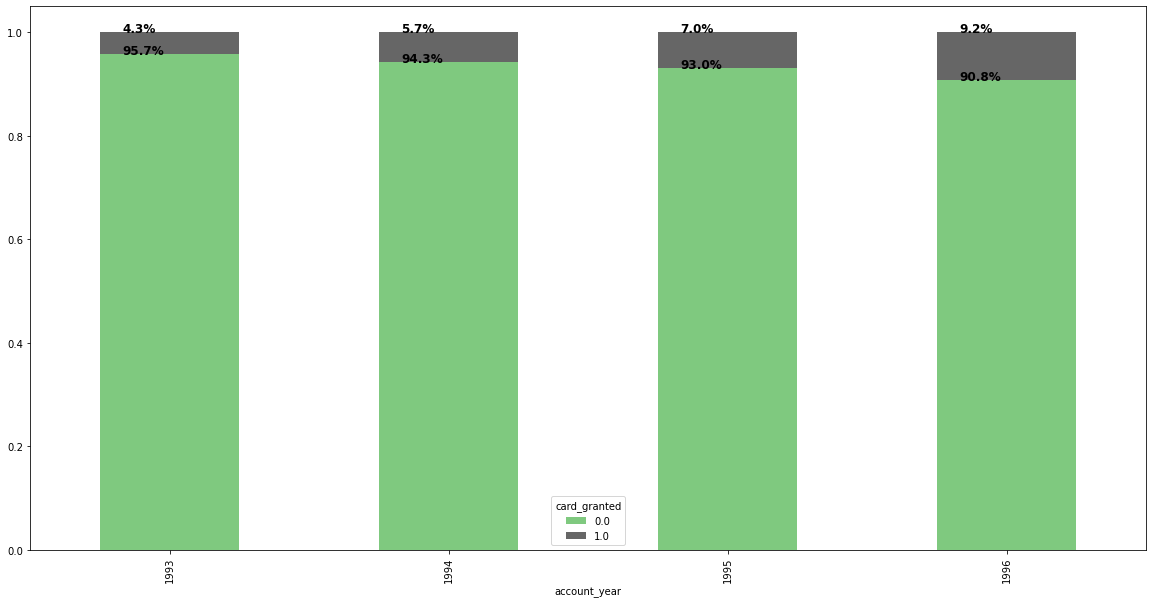

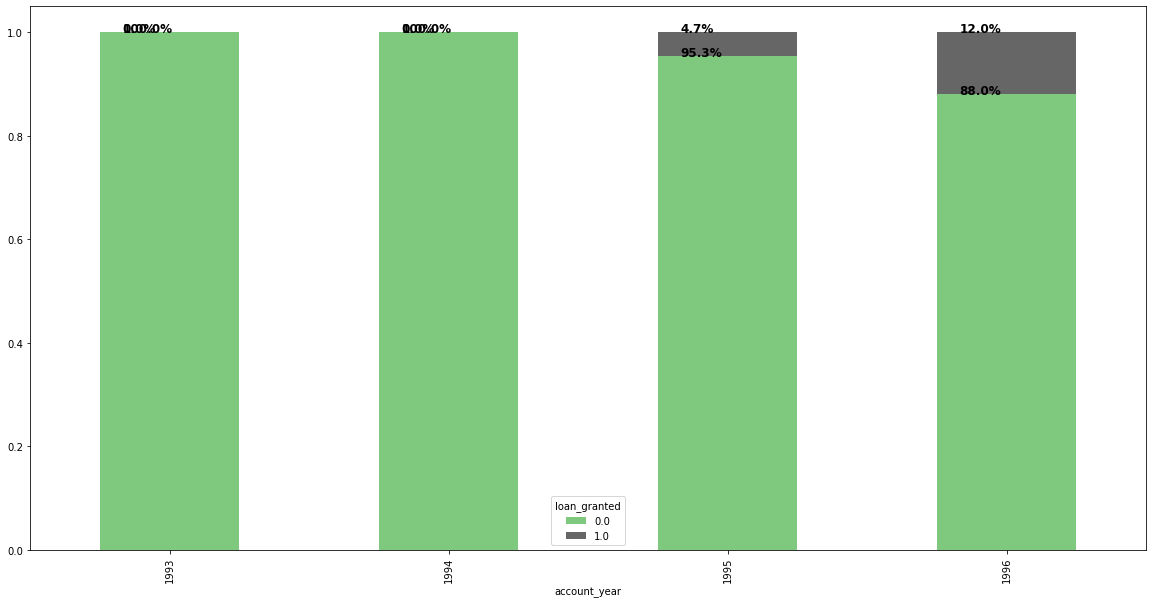

In [214]:
# Account Year Distribution Card Granted wise
AY_card_dist = pd.crosstab(index=Final_Table['account_year'],
                        columns=Final_Table['card_granted'],normalize="index")

# Account Year Loan Granted wise
AY_loan_dist = pd.crosstab(index=Final_Table['account_year'],
                        columns=Final_Table['loan_granted'],normalize="index")


#Creating side by side plots
plt.plot1 = AY_card_dist.plot(kind='bar', 
                    stacked=True, 
                    colormap="Accent",
                    figsize=(20, 10))
for n, x in enumerate([*AY_card_dist.index.values]):
    for (proportion, y_loc) in zip(AY_card_dist.loc[x],
                                   AY_card_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")



plt.plot2 = AY_loan_dist.plot(kind='bar', 
                    stacked=True, 
                    colormap="Accent",
                    figsize=(20, 10))

for n, x in enumerate([*AY_loan_dist.index.values]):
    for (proportion, y_loc) in zip(AY_loan_dist.loc[x],
                                   AY_loan_dist.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

        


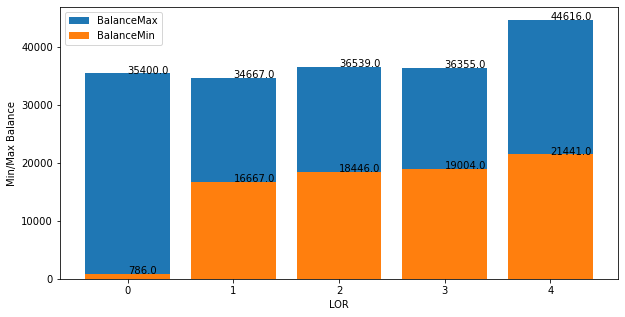

In [215]:
Final_Table_lor = Final_Table.groupby("lor").mean().reset_index()
fig,ax = plt.subplots(figsize = (10,5))
ax= plt.bar(Final_Table_lor["lor"], Final_Table_lor["BalanceMax"],align="center")
ax2 = plt.bar(Final_Table_lor["lor"], Final_Table_lor["BalanceMin"],align="center")
plt.xticks(Final_Table_lor["lor"])
plt.legend(["BalanceMax", "BalanceMin"])
for index, value in enumerate(Final_Table_lor["BalanceMax"].round()):
    plt.text( index,value,str(value))
for index, value in enumerate(Final_Table_lor["BalanceMin"].round()):
    plt.text( index,value,str(value))

plt.xlabel('LOR')
plt.ylabel('Min/Max Balance')
plt.show(fig)